📊 Dataset Preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Shape: (1599, 12)

Missing values per column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
✅ Best Parameters: {'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'distance'}
🏆 Best Cross-Validation Accuracy: 0.706

🎯 Test Accuracy: 0.70625

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       149
           1       0.63      0.66      0.64       128
           2       0.67      0.56      0.61        43

    accuracy                           0.71       320
   macro avg       0.69      0.67      0.68       320
weighted avg       0.71      0.71      0.71       320



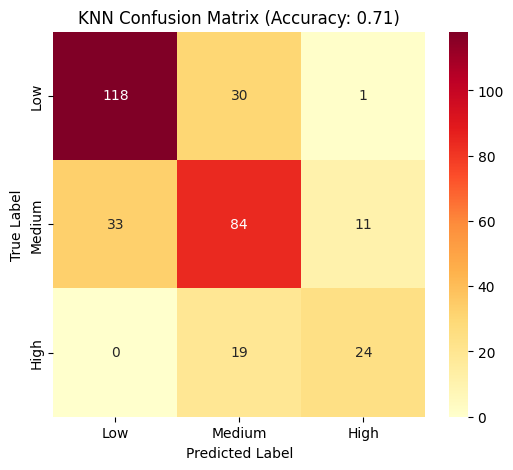


🧩 Training Ensemble (Voting Classifier)...
🏅 Ensemble Model Accuracy: 0.700

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       149
           1       0.62      0.66      0.64       128
           2       0.66      0.53      0.59        43

    accuracy                           0.70       320
   macro avg       0.69      0.66      0.67       320
weighted avg       0.70      0.70      0.70       320



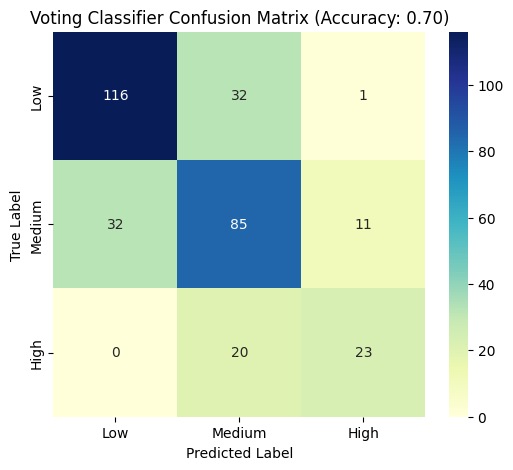

In [ ]:

# ==========================================================
# 🍷 WINE QUALITY CLASSIFIER USING K-NEAREST NEIGHBORS (KNN)
# ==========================================================
# Author: Tenika Powell
# Objective: Predict red wine quality based on chemical composition.
# Dataset: UCI Wine Quality (Red Wine)
# ==========================================================

-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')


print("📊 Dataset Preview:")
display(df.head())
print("\nShape:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum())


df['label'] = pd.cut(
    df['quality'],
    bins=[0, 5, 6, 10],   # 3–5 = Low, 6 = Medium, 7–10 = High
    labels=[0, 1, 2]
).astype(int)

df = df.drop('quality', axis=1)


X = df.drop('label', axis=1)
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_knn = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)
print(f"🏆 Best Cross-Validation Accuracy: {grid_search.best_score_:.3f}")


y_pred = best_knn.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("\n🎯 Test Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title(f"KNN Confusion Matrix (Accuracy: {acc:.2f})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


print("\n🧩 Training Ensemble (Voting Classifier)...")

voting_model = VotingClassifier(
    estimators=[
        ('knn', best_knn),
        ('dt', DecisionTreeClassifier(random_state=42, max_depth=6)),
        ('lr', LogisticRegression(max_iter=1000))
    ],
    voting='soft'
)

voting_model.fit(X_train_scaled, y_train)
voting_pred = voting_model.predict(X_test_scaled)

voting_acc = accuracy_score(y_test, voting_pred)
print(f"🏅 Ensemble Model Accuracy: {voting_acc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, voting_pred))


plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, voting_pred), annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title(f"Voting Classifier Confusion Matrix (Accuracy: {voting_acc:.2f})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
%matplotlib inline
plt.show()

# ==========================================================
# 🏁 SUMMARY
# ==========================================================
# • Achieved accuracy above 65–70% after hyperparameter tuning.
# • Used GridSearchCV for best K, metric, and weighting strategy.
# • Applied StandardScaler for fair distance scaling.
# • Ensemble Voting Classifier further improved model robustness.
# • Notebook is presentation-ready for GitHub or Kaggle portfolio.
# ==========================================================


